In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# image_info = pd.read_excel('./image_info.xls')
image_info = pd.read_csv('./train_data_1056(22.03.07).csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
image_info.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win
0,23509,SSR1414-竖版（3D混剪）,16,2020-07-16,489.0,3913.53,0.0,57.0,0.0,1.0,0.0000,68.658421,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0702,262.0,2021-05-01,3
1,24402,SSR1588-横版（端游混剪）,16,2020-08-17,978.0,39198.18,10.0,747.0,3472.0,16.0,0.0134,52.474137,3919.818000,0.0,0.0000,0.0,0.0,0.088576,0.0636,13370.0,2021-05-01,3
2,26441,SSR1909-竖版（3D混剪）,16,2020-11-10,757.0,78904.83,14.0,2120.0,1478.0,26.0,0.0066,37.219259,5636.059286,2.0,0.0769,739.0,7.0,0.018731,0.0729,44716.0,2021-05-01,3
3,27824,SSR2078-横版（3D混剪）,16,2020-12-16,508.0,9341.00,0.0,81.0,0.0,7.0,0.0000,115.320988,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.1333,1496.0,2021-05-01,3
4,27945,SSR2101-横版（3D混剪),16,2020-12-21,626.0,14992.50,2.0,117.0,254.0,3.0,0.0171,128.141026,7496.250000,0.0,0.0000,0.0,0.0,0.016942,0.1538,6368.0,2021-05-01,3


In [5]:
image_info.columns

Index(['image_id', 'image_name', 'media_id', 'image_launch_time',
       'image_source_total_num', 'image_run_date_amount',
       'image_create_role_pay_num', 'image_create_role_num',
       'image_create_role_pay_sum', 'image_source_num',
       'image_create_role_pay_rate', 'image_create_role_cost',
       'image_create_role_pay_cost', 'image_valid_source_num',
       'image_valid_source_rate', 'image_pay_sum_ability',
       'image_pay_num_ability', 'image_create_role_roi',
       'image_create_role_retain_1d', 'create_role_30_pay_sum',
       'model_run_datetime', 'data_win'],
      dtype='object')

In [6]:
image_info['model_run_datetime'].min()

'2021-05-01'

In [7]:
image_info['model_run_datetime'].max()

'2022-02-01'

In [8]:
image_info.shape

(75175, 22)

In [9]:
image_info['image_id'].nunique()

2581

In [10]:
image_info['image_30_roi'] = image_info['create_role_30_pay_sum'] / image_info['image_run_date_amount']

In [11]:
image_info.corr()['image_30_roi'].sort_values(ascending=False)

image_30_roi                   1.000000
image_create_role_roi          0.235949
create_role_30_pay_sum         0.122365
image_create_role_pay_rate     0.087855
image_create_role_retain_1d    0.065373
image_create_role_pay_sum      0.039919
image_valid_source_rate        0.036365
image_pay_sum_ability          0.028028
image_valid_source_num         0.026599
image_source_total_num         0.024990
image_create_role_pay_num      0.016156
image_source_num               0.014092
image_pay_num_ability          0.012080
image_create_role_num          0.010958
image_run_date_amount          0.010309
image_create_role_pay_cost     0.008397
media_id                      -0.011729
image_create_role_cost        -0.017878
image_id                      -0.021848
data_win                            NaN
Name: image_30_roi, dtype: float64

In [12]:
image_info['label'] = image_info['image_30_roi'].apply(lambda x:1 if x>=0.4 else(0 if x<0.25 else 2))

In [13]:
image_info_label = image_info[image_info['label']!=2]

### EDA

In [14]:
image_info_label.shape

(68929, 24)

In [15]:
image_info_label = image_info_label[image_info_label['image_run_date_amount']>=500]

In [16]:
image_info_label.shape

(58800, 24)

In [17]:
image_info_label.nunique().sort_values()

data_win                           1
label                              2
media_id                           2
image_valid_source_num            50
image_create_role_pay_num        149
image_pay_num_ability            253
model_run_datetime               277
image_source_num                 299
image_launch_time                334
image_source_total_num           376
image_valid_source_rate          511
image_create_role_pay_rate       834
image_pay_sum_ability           1677
image_id                        2484
image_name                      2484
image_create_role_retain_1d     2616
image_create_role_num           2639
image_create_role_pay_sum       3638
create_role_30_pay_sum         11194
image_create_role_roi          21926
image_create_role_pay_cost     27129
image_30_roi                   38122
image_run_date_amount          56220
image_create_role_cost         56372
dtype: int64

In [18]:
image_info_label.drop(['data_win','image_30_roi'], axis=1, inplace=True)

In [19]:
image_info_label['image_valid_source_num'].value_counts()

0.0     53476
1.0      1058
2.0       989
3.0       768
4.0       674
5.0       444
6.0       321
7.0       243
8.0       151
9.0       136
10.0      105
11.0       68
12.0       66
13.0       53
14.0       32
15.0       31
16.0       28
17.0       21
20.0       17
18.0       17
21.0       16
19.0       10
23.0        7
30.0        6
25.0        6
26.0        6
27.0        6
22.0        6
31.0        4
24.0        4
29.0        4
28.0        3
61.0        2
34.0        2
32.0        2
53.0        2
33.0        2
35.0        2
51.0        1
38.0        1
56.0        1
43.0        1
42.0        1
65.0        1
50.0        1
46.0        1
40.0        1
45.0        1
55.0        1
36.0        1
Name: image_valid_source_num, dtype: int64

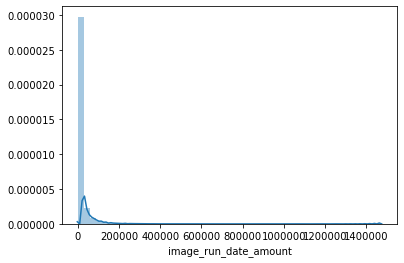

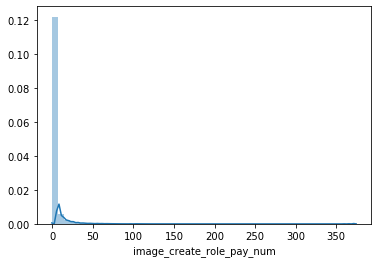

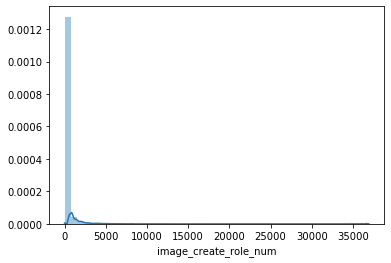

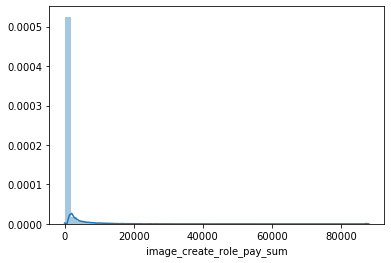

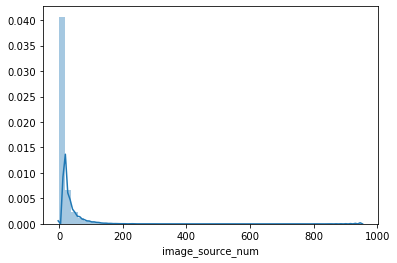

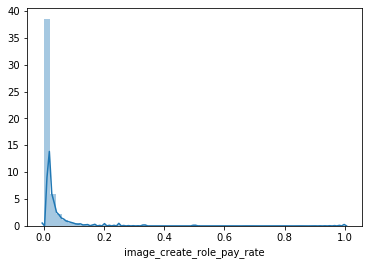

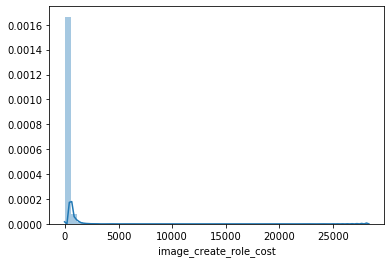

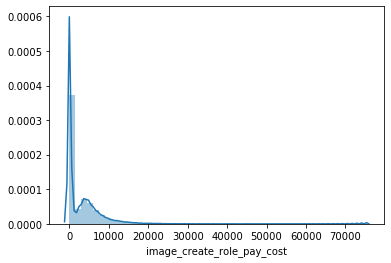

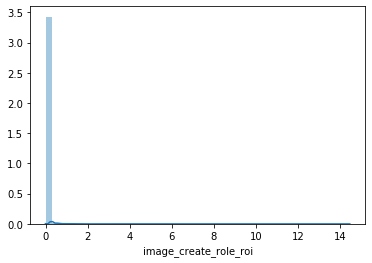

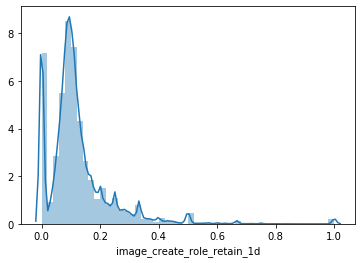

In [20]:
columns = ['image_run_date_amount', 'image_create_role_pay_num',
       'image_create_role_num', 'image_create_role_pay_sum',
       'image_source_num', 'image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost',
       'image_create_role_roi', 'image_create_role_retain_1d']
for col in columns:
    sns.distplot(image_info_label[col])
    plt.show()

In [21]:
image_info_label[image_info_label['image_create_role_cost']>=800].shape

(1582, 22)

In [22]:
image_info_label = image_info_label[image_info_label['image_create_role_cost']<800]

In [23]:
image_info_label['image_create_role_cost'].replace(0,float('inf'),inplace=True)

In [24]:
image_info_label['image_create_role_pay_cost'].replace(0,float('inf'),inplace=True)

In [25]:
image_info_label['image_create_role_pay_cost'].value_counts().sort_index()

283.648          1
287.445          1
290.035          1
302.310          1
302.320          1
             ...  
63130.230        1
68889.630        1
73714.320        1
74693.290        1
inf          30002
Name: image_create_role_pay_cost, Length: 26997, dtype: int64

In [26]:
image_info_label = image_info_label[image_info_label['image_create_role_pay_cost']>1000]

In [27]:
image_info_label.shape

(56646, 22)

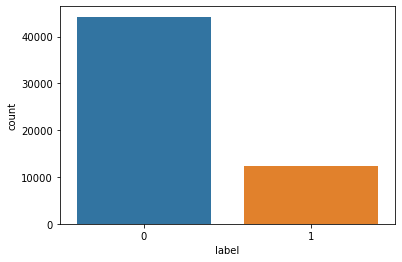

In [28]:
sns.countplot(x='label',data=image_info_label)
plt.show()

In [29]:
#多变量分析
image_info_label.corr()

,image_id,media_id,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,label
image_id,1.000000,-0.051629,-0.346504,-0.135999,-0.148445,-0.139339,-0.119928,-0.106043,-0.022315,0.223591,0.090524,-0.015628,-0.027514,-0.010550,-0.013637,-0.042214,-0.083530,-0.118079,-0.134715
media_id,-0.051629,1.000000,0.064927,-0.069058,-0.099578,-0.083186,-0.079523,0.022597,-0.091750,-0.018717,0.113411,-0.029860,-0.053131,-0.033548,-0.040652,-0.043740,-0.128130,-0.054567,-0.054144
image_source_total_num,-0.346504,0.064927,1.000000,0.400354,0.351933,0.331163,0.308087,0.458869,0.032369,-0.152116,0.036801,0.020921,-0.019222,0.031573,0.042316,0.051390,0.060940,0.363236,0.243970
image_run_date_amount,-0.135999,-0.069058,0.400354,1.000000,0.957106,0.921852,0.820092,0.665675,0.027432,-0.195176,0.019286,-0.002230,-0.053105,0.065449,0.080246,0.084199,-0.045817,0.845171,0.342390
image_create_role_pay_num,-0.148445,-0.099578,0.351933,0.957106,1.000000,0.938729,0.837851,0.571257,0.073069,-0.185279,-0.132127,0.041266,-0.006824,0.079271,0.105805,0.098759,-0.025661,0.832246,0.338623
image_create_role_num,-0.139339,-0.083186,0.331163,0.921852,0.938729,1.000000,0.778939,0.537747,-0.010044,-0.201542,-0.051022,-0.012519,-0.041350,0.051824,0.065900,0.067859,-0.061570,0.804372,0.295375
image_create_role_pay_sum,-0.119928,-0.079523,0.308087,0.820092,0.837851,0.778939,1.000000,0.495822,0.054822,-0.142191,-0.086623,0.027070,-0.017899,0.131780,0.082505,0.281904,-0.021330,0.807926,0.366383
image_source_num,-0.106043,0.022597,0.458869,0.665675,0.571257,0.537747,0.495822,1.000000,0.053936,-0.163801,0.096498,0.035595,-0.074246,0.032654,0.037123,0.082243,-0.008786,0.571486,0.329923
image_create_role_pay_rate,-0.022315,-0.091750,0.032369,0.027432,0.073069,-0.010044,0.054822,0.053936,1.000000,0.122322,-0.368635,0.267326,0.358592,0.075756,0.134367,0.233255,0.271169,0.036376,0.165466
image_create_role_cost,0.223591,-0.018717,-0.152116,-0.195176,-0.185279,-0.201542,-0.142191,-0.163801,0.122322,1.000000,0.057508,-0.011687,-0.021522,-0.020964,-0.042007,-0.044667,0.194519,-0.166920,-0.195709


In [30]:
#特征选择,woe分箱
from scipy import stats
def monoto_bin(Y, X, n = 20):
    r = 0
    total_bad = Y.sum()
    total_good =Y.count()-total_bad  
    while np.abs(r) < 0.9:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n,duplicates='raise')})
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
#     print(r)
#     print(n)
    d3 = pd.DataFrame(d2.min().X, columns = ['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    #d3[Y.name + '_rate'] = d2.mean().Y
    d3['badattr']=d3[Y.name]/total_bad
    d3['goodattr']=(d3['total']-d3[Y.name])/total_good
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min_' + X.name)).reset_index(drop = True)
    print ("=" * 80)
    cut = []
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua =X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4,iv,cut,woe

In [32]:
dfx1,ivx1,cutx1,woex1 = monoto_bin(image_info_label['label'],image_info_label['image_run_date_amount'],n=10)
# dfx2,ivx2,cutx2,woex2 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_num'],n=10)
dfx3,ivx3,cutx3,woex3 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_num'],n=10)
# dfx4,ivx4,cutx4,woex4 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_sum'],n=10)
# dfx5,ivx5,cutx5,woex5 = monoto_bin(image_info_label['label'],image_info_label['image_source_num'],n=10)
# dfx6,ivx6,cutx6,woex6 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_rate'],n=10)
dfx7,ivx7,cutx7,woex7 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_cost'],n=10)
# dfx8,ivx8,cutx8,woex8 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_cost'],n=10)
# dfx9,ivx9,cutx9,woex9 = monoto_bin(image_info_label['label'],image_info_label['image_valid_source_rate'],n=10)
# dfx10,ivx10,cutx10,woex10 = monoto_bin(image_info_label['label'],image_info_label['image_pay_sum_ability'],n=10)
# dfx11,ivx11,cutx11,woex11 = monoto_bin(image_info_label['label'],image_info_label['image_pay_num_ability'],n=10)
# dfx12,ivx12,cutx12,woex12 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_roi'],n=10)
# dfx13,ivx13,cutx13,woex13 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_retain_1d'],n=10)

[1.248, 1.196, 0.952, 0.745, 0.586, 0.363, 0.017, -0.337, -0.812, -1.839]


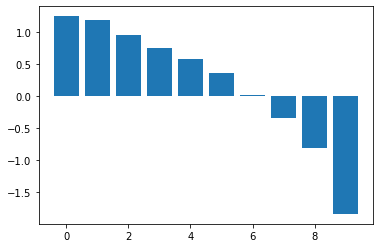

[1.641, 1.242, 0.901, 0.784, 0.464, 0.242, 0.009, -0.34, -0.775, -1.885]


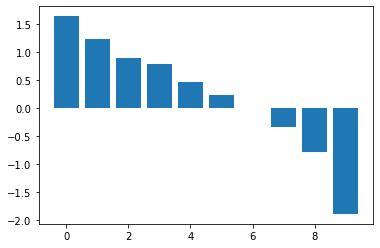

[-0.856, -0.626, -0.399, -0.17, -0.044, 0.192, 0.36, 0.45, 0.83, 1.393]


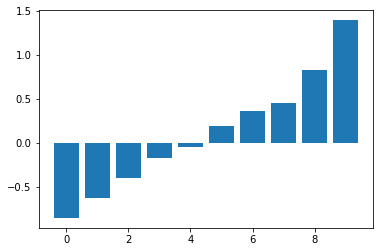

In [33]:
woex = [woex1,woex3,woex7]
for col in woex:
    print('{}'.format(col))
    plt.bar(range(len(col)),col)
    plt.show()

In [34]:
def self_bin(Y, X, bin):
    r = 0
    total_bad = Y.sum()
    total_good =Y.count()-total_bad  
    d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.cut(X, bin)})
    d2 = d1.groupby('Bucket', as_index = True)
    r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        
    d3 = pd.DataFrame(d2.min().X, columns = ['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    #d3[Y.name + '_rate'] = d2.mean().Y
    #好坏比，求woe,证据权重，自变量对目标变量有没有影响，什么影响
    d3['badattr']=d3[Y.name]/total_bad
    d3['goodattr']=(d3['total']-d3[Y.name])/total_good
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    #iv，信息值，自变量对于目标变量的影响程度
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min_' + X.name)).reset_index(drop = True)
    print ("=" * 80)
#     print (d4)
    woe = list(d4['woe'].round(3))
    return d4,iv,woe

In [35]:
cutx1

[-inf,
 864.32,
 1412.85,
 2148.085,
 3212.04,
 4693.965,
 6913.4,
 10811.36,
 18606.09,
 38693.12,
 inf]

In [46]:
pinf = float('inf')#正无穷大
ninf = float('-inf')#负无穷大
cutx2 = [ninf, 1, 3, 8, 12,50,pinf]
cutx4 = [ninf,60,200,700,2000,5000,10000,pinf]
cutx5 = [ninf,3,6,12,20,50,pinf]
cutx6 = [ninf,0.005,0.01,0.015,0.02,pinf]
cutx8 = [ninf, 2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,13000,pinf]
cutx9 = [ninf, 0.1, 0.2, 0.3, 0.4,0.6,pinf]
cutx10 = [ninf, 50,100,200, 400,1000, pinf]
cutx11 = [ninf, 1,2,5,10,pinf]
cutx12 = [ninf, 0.005,0.01,0.015,0.02,0.025,0.05,pinf]
cutx13 = [ninf, 0.06,0.1,0.14,0.2,0.3,pinf]

In [43]:
image_info_label['image_pay_num_ability'].describe()

count    56646.000000
mean         0.081438
std          0.646915
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         59.500000
Name: image_pay_num_ability, dtype: float64

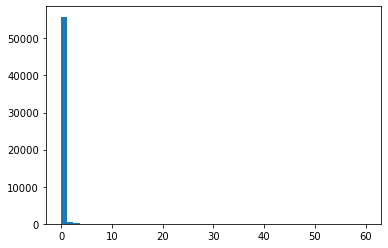

In [45]:
plt.hist(image_info_label['image_pay_num_ability'],bins=50,range=(0,60))
plt.show()

In [47]:
dfx2,ivx2,woex2 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_num'],cutx2)
dfx4,ivx4,woex4 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_sum'],cutx4)
dfx5,ivx5,woex5 = self_bin(image_info_label['label'],image_info_label['image_source_num'],cutx5)
dfx6,ivx6,woex6 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_rate'],cutx6)
dfx8,ivx8,woex8 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_cost'],cutx8)
dfx9,ivx9,woex9 = self_bin(image_info_label['label'],image_info_label['image_valid_source_rate'],cutx9)
dfx10,ivx10,woex10 = self_bin(image_info_label['label'],image_info_label['image_pay_sum_ability'],cutx10)
dfx11,ivx11,woex11 = self_bin(image_info_label['label'],image_info_label['image_pay_num_ability'],cutx11)
dfx12,ivx12,woex12 = self_bin(image_info_label['label'],image_info_label['image_create_role_roi'],cutx12)
dfx13,ivx13,woex13 = self_bin(image_info_label['label'],image_info_label['image_create_role_retain_1d'],cutx13)

In [48]:
for i in range(1,14):
    exec("print('woex%s =',woex%s)"%(i,i))

woex1 = [1.248, 1.196, 0.952, 0.745, 0.586, 0.363, 0.017, -0.337, -0.812, -1.839]
woex2 = [0.831, -0.553, -1.088, -1.573, -2.481, -5.379]
woex3 = [1.641, 1.242, 0.901, 0.784, 0.464, 0.242, 0.009, -0.34, -0.775, -1.885]
woex4 = [1.116, -0.054, -0.71, -1.493, -2.506, -3.988, -7.241]
woex5 = [0.946, 0.679, 0.25, -0.13, -0.707, -1.864]
woex6 = [1.235, -0.726, -1.053, -1.002, -0.688]
woex7 = [-0.856, -0.626, -0.399, -0.17, -0.044, 0.192, 0.36, 0.45, 0.83, 1.393]
woex8 = [-0.845, -0.891, -1.164, -1.09, -0.922, -0.791, -0.557, -0.479, -0.369, -0.354, -0.25, 1.156]
woex9 = [0.079, -0.669, -0.729, -0.764, -0.633, -0.799]
woex10 = [0.071, -0.863, -1.129, -1.893, -2.463, -3.042]
woex11 = [0.023, -1.081, -1.191, -1.274, -3.433]
woex12 = [1.169, 0.16, -0.183, -0.436, -0.705, -1.184, -2.472]
woex13 = [2.013, -0.396, -0.474, 0.184, 0.018, 0.103]


In [49]:
for i in range(1,14):
    exec("print('cutx%s =',cutx%s)"%(i,i))

cutx1 = [-inf, 864.32, 1412.85, 2148.085, 3212.04, 4693.965, 6913.4, 10811.36, 18606.09, 38693.12, inf]
cutx2 = [-inf, 1, 3, 8, 12, 50, inf]
cutx3 = [-inf, 4.0, 7.0, 13.0, 21.0, 34.0, 55.0, 94.0, 177.0, 431.0, inf]
cutx4 = [-inf, 60, 200, 700, 2000, 5000, 10000, inf]
cutx5 = [-inf, 3, 6, 12, 20, 50, inf]
cutx6 = [-inf, 0.005, 0.01, 0.015, 0.02, inf]
cutx7 = [-inf, 57.2475, 76.5477, 94.7068, 113.6604, 136.6316, 165.7038, 205.66, 269.2838, 399.2947, inf]
cutx8 = [-inf, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 13000, inf]
cutx9 = [-inf, 0.1, 0.2, 0.3, 0.4, 0.6, inf]
cutx10 = [-inf, 50, 100, 200, 400, 1000, inf]
cutx11 = [-inf, 1, 2, 5, 10, inf]
cutx12 = [-inf, 0.005, 0.01, 0.015, 0.02, 0.025, 0.05, inf]
cutx13 = [-inf, 0.06, 0.1, 0.14, 0.2, 0.3, inf]


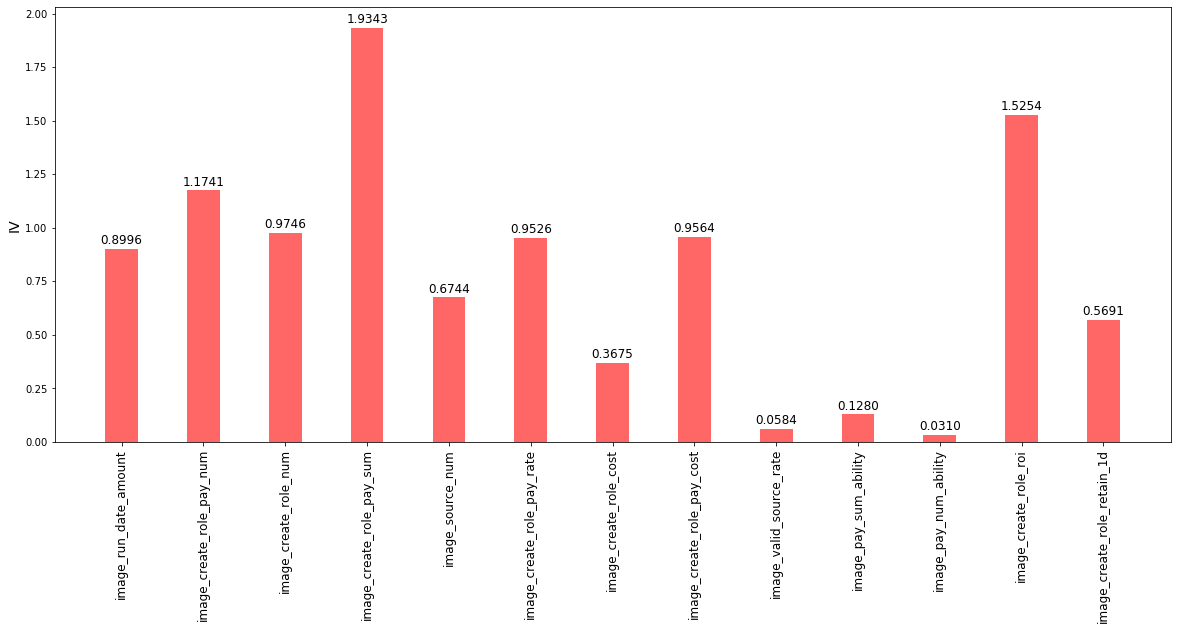

In [50]:
y=[ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10,ivx11,ivx12,ivx13]
index=['image_run_date_amount', 'image_create_role_pay_num',
       'image_create_role_num', 'image_create_role_pay_sum',
       'image_source_num', 'image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost','image_valid_source_rate',
       'image_pay_sum_ability', 'image_pay_num_ability',
       'image_create_role_roi','image_create_role_retain_1d']
fig= plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(range(1,14), y, width=0.4,color = 'r',alpha = 0.6)#生成柱状图
ax1.set_xticks(range(1,14))
ax1.set_xticklabels(index, rotation=90, fontsize=12)
ax1.set_ylabel('IV', fontsize=14)
#在柱状图上添加数字标签
for i, v in enumerate(y):
    plt.text(i+1, v+0.01, '%.4f' % v, ha='center', va='bottom', fontsize=12)
plt.show()

In [51]:
"""
根据IV值判断变量预测能力的标准:
< 0.02： useless for predition
0.02-0.1： weak predictor
0.1-0.3： medium predictor
0.3-0.5： strong predictor
大于0.5： suspicious or too good to be true
"""
#删除掉iv小于0.1的变量
select_feature = ['image_run_date_amount', 'image_create_role_pay_num',
       'image_create_role_num', 'image_create_role_pay_sum',
       'image_source_num', 'image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost',
       'image_valid_source_rate',
       'image_pay_sum_ability', 'image_pay_num_ability',
       'image_create_role_roi', 'label']

In [52]:
len(select_feature)

13

In [53]:
def change_woe(d,cut,woe):
    """
    将每个样本对应特征值更换为woe值
    """
    list1=[]
    i=0
    while i<len(d):
        value=d.values[i]
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if value>=cut[j]:
                j=-1
            else:
                j -=1
                m -= 1
        list1.append(woe[m])
        i += 1
    return list1

In [54]:
image_info_change = image_info_label.copy()

In [55]:
image_info_change.shape

(56646, 22)

In [57]:
pinf = float('inf')#正无穷大
ninf = float('-inf')#负无穷大
woex1 = [1.248, 1.196, 0.952, 0.745, 0.586, 0.363, 0.017, -0.337, -0.812, -1.839]
woex2 = [0.831, -0.553, -1.088, -1.573, -2.481, -5.379]
woex3 = [1.641, 1.242, 0.901, 0.784, 0.464, 0.242, 0.009, -0.34, -0.775, -1.885]
woex4 = [1.116, -0.054, -0.71, -1.493, -2.506, -3.988, -7.241]
woex5 = [0.946, 0.679, 0.25, -0.13, -0.707, -1.864]
woex6 = [1.235, -0.726, -1.053, -1.002, -0.688]
woex7 = [-0.856, -0.626, -0.399, -0.17, -0.044, 0.192, 0.36, 0.45, 0.83, 1.393]
woex8 = [-0.845, -0.891, -1.164, -1.09, -0.922, -0.791, -0.557, -0.479, -0.369, -0.354, -0.25, 1.156]
woex9 = [0.079, -0.669, -0.729, -0.764, -0.633, -0.799]
woex10 = [0.071, -0.863, -1.129, -1.893, -2.463, -3.042]
woex11 = [0.023, -1.081, -1.191, -1.274, -3.433]
woex12 = [1.169, 0.16, -0.183, -0.436, -0.705, -1.184, -2.472]

cutx1 = [ninf, 864.32, 1412.85, 2148.085, 3212.04, 4693.965, 6913.4, 10811.36, 18606.09, 38693.12, pinf]
cutx2 = [ninf, 1, 3, 8, 12, 50, pinf]
cutx3 = [ninf, 4.0, 7.0, 13.0, 21.0, 34.0, 55.0, 94.0, 177.0, 431.0, pinf]
cutx4 = [ninf, 60, 200, 700, 2000, 5000, 10000, pinf]
cutx5 = [ninf, 3, 6, 12, 20, 50, pinf]
cutx6 = [ninf, 0.005, 0.01, 0.015, 0.02, pinf]
cutx7 = [ninf, 57.2475, 76.5477, 94.7068, 113.6604, 136.6316, 165.7038, 205.66, 269.2838, 399.2947, pinf]
cutx8 = [ninf, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 13000, pinf]
cutx9 = [ninf, 0.1, 0.2, 0.3, 0.4, 0.6, pinf]
cutx10 = [ninf, 50, 100, 200, 400, 1000, pinf]
cutx11 = [ninf, 1, 2, 5, 10, pinf]
cutx12 = [ninf, 0.005, 0.01, 0.015, 0.02, 0.025, 0.05, pinf]

In [58]:
#数据转化
image_info_change['image_run_date_amount'] = change_woe(image_info_change['image_run_date_amount'], cutx1, woex1)
image_info_change['image_create_role_pay_num'] = change_woe(image_info_change['image_create_role_pay_num'], cutx2, woex2)
image_info_change['image_create_role_num'] = change_woe(image_info_change['image_create_role_num'], cutx3, woex3)
image_info_change['image_create_role_pay_sum'] = change_woe(image_info_change['image_create_role_pay_sum'], cutx4, woex4)
image_info_change['image_source_num'] = change_woe(image_info_change['image_source_num'], cutx5, woex5)
image_info_change['image_create_role_pay_rate'] = change_woe(image_info_change['image_create_role_pay_rate'], cutx6, woex6)
image_info_change['image_create_role_cost'] = change_woe(image_info_change['image_create_role_cost'], cutx7, woex7)
image_info_change['image_create_role_pay_cost'] = change_woe(image_info_change['image_create_role_pay_cost'], cutx8, woex8)
image_info_change['image_valid_source_rate'] = change_woe(image_info_change['image_valid_source_rate'], cutx9, woex9)
image_info_change['image_pay_sum_ability'] = change_woe(image_info_change['image_pay_sum_ability'], cutx10, woex10)
image_info_change['image_pay_num_ability'] = change_woe(image_info_change['image_pay_num_ability'], cutx11, woex11)
image_info_change['image_create_role_roi'] = change_woe(image_info_change['image_create_role_roi'], cutx12, woex12)

In [59]:
image_info_change.shape

(56646, 22)

In [60]:
image_info_change.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label
0,23509,SSR1414-竖版（3D混剪）,16,2020-07-16,489.0,0.586,0.831,0.009,1.116,0.946,1.235,-0.626,1.156,0.0,0.079,0.071,0.023,1.169,0.0702,262.0,2021-05-01,0
2,26441,SSR1909-竖版（3D混剪）,16,2020-11-10,757.0,-1.839,-2.481,-1.885,-1.493,-0.707,-0.726,-0.856,-0.922,2.0,0.079,-2.463,-1.274,-0.436,0.0729,44716.0,2021-05-01,1
3,27824,SSR2078-横版（3D混剪）,16,2020-12-16,508.0,0.017,0.831,0.009,1.116,0.250,1.235,-0.044,1.156,0.0,0.079,0.071,0.023,1.169,0.1333,1496.0,2021-05-01,0
4,27945,SSR2101-横版（3D混剪),16,2020-12-21,626.0,-0.337,-0.553,-0.340,-0.710,0.679,-1.002,-0.044,-0.557,0.0,0.079,0.071,0.023,-0.436,0.1538,6368.0,2021-05-01,1
5,28193,SSR2138-竖版（3D混剪）~1,16,2020-12-28,626.0,1.248,0.831,0.784,1.116,0.679,1.235,-0.856,1.156,0.0,0.079,0.071,0.023,1.169,0.1250,0.0,2021-05-01,0


In [61]:
image_info_change.to_csv('./image_info_change.csv',index=0)

In [62]:
data_info = image_info_change[select_feature]

In [63]:
data_info.shape

(56646, 13)

In [64]:
#模型建立
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, roc_auc_score,auc, classification_report

In [65]:
x_train, x_test, y_train, y_test = train_test_split(data_info.drop('label',axis=1), data_info['label'], test_size=0.25, random_state=42)

### RandomForestClassifier

In [66]:
RF = RandomForestClassifier()
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 100, 150],
           "max_depth" : [2,3,5,7,9],
           "min_samples_leaf" : [2, 4, 6, 8]}
RF_random = RandomizedSearchCV(RF, param_distributions=param_grid, cv=5)
RF_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 5, 7, 9],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'n_estimators': [9, 18, 27, 36, 100,
                                                         150]})

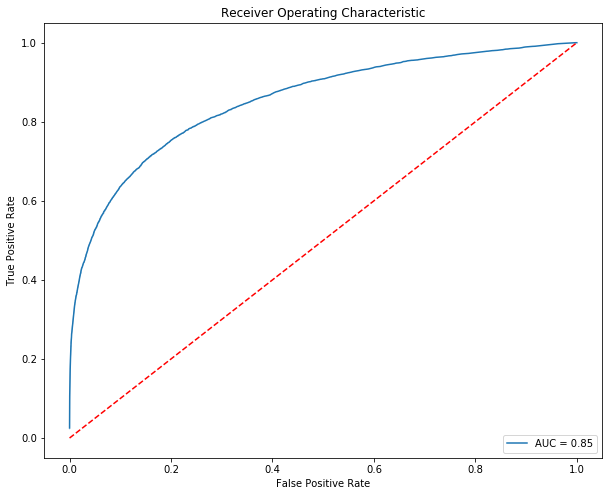

In [67]:
# 训练集评估
best_est_RF = RF_random.best_estimator_
y_pred = best_est_RF.predict_proba(x_train)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

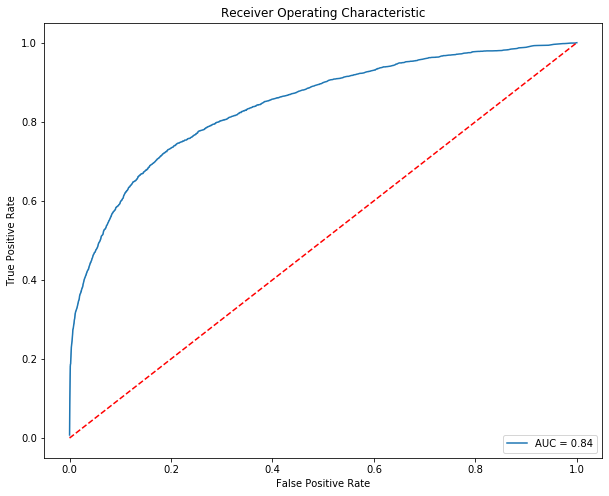

In [68]:
# 测试集评估
best_est_RF = RF_random.best_estimator_
y_pred = best_est_RF.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [69]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11073
           1       0.65      0.57      0.61      3089

    accuracy                           0.84     14162
   macro avg       0.77      0.74      0.75     14162
weighted avg       0.83      0.84      0.84     14162



In [70]:
import joblib
joblib.dump(best_est_RF, 'best_est_RF.pkl')

['best_est_RF.pkl']

### LogisticRegression

In [71]:
LR = LogisticRegression()
param_grid = {"C" : [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9, 1]}
LR_random = RandomizedSearchCV(LR, param_distributions=param_grid, cv=5)
LR_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                              0.8, 0.9, 1]})

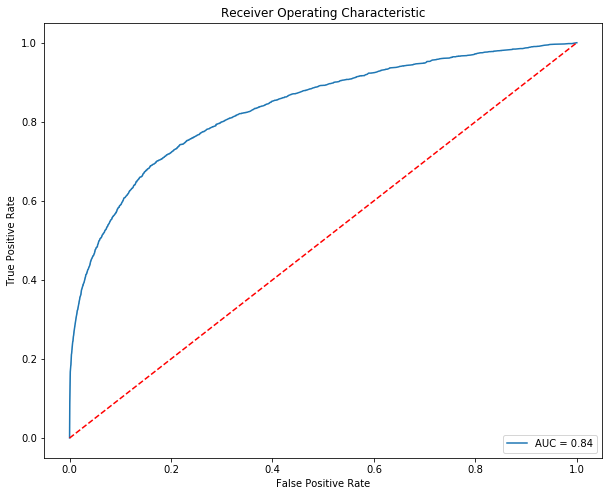

In [72]:
# 测试集评估
best_est_LR = LR_random.best_estimator_
y_pred = best_est_LR.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [73]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     11073
           1       0.61      0.60      0.61      3089

    accuracy                           0.83     14162
   macro avg       0.75      0.75      0.75     14162
weighted avg       0.83      0.83      0.83     14162



### XGB

In [78]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_jobs=-1) 
 
param_grid = {
                  'n_estimators' :[100,150,200,250,300],
                  "learning_rate" : [0.001,0.01,0.0001,0.05, 0.10 ],
                  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3 ],
                  "colsample_bytree" : [0.5,0.7],
                  'max_depth': [3,4,6,8,10,12,15,20,25,30]
              }
XGB_random = RandomizedSearchCV(XGB, param_distributions=param_grid, cv=5)
XGB_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

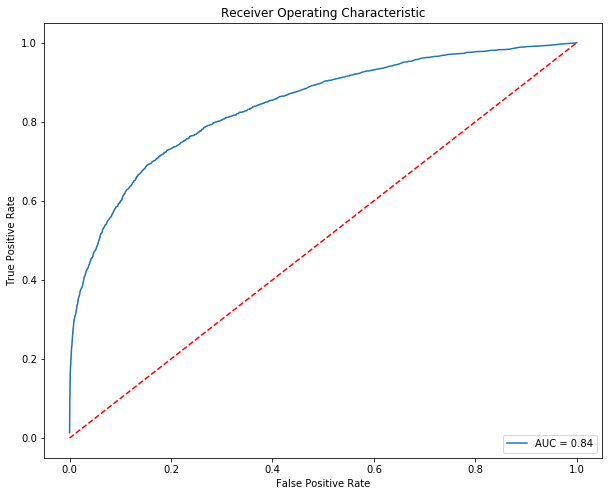

In [79]:
# 测试集评估
best_est_XGB = XGB_random.best_estimator_
y_pred = best_est_XGB.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     11073
           1       0.62      0.61      0.62      3089

    accuracy                           0.83     14162
   macro avg       0.75      0.75      0.75     14162
weighted avg       0.83      0.83      0.83     14162



In [81]:
joblib.dump(best_est_XGB, 'best_est_XGB.pkl')

['best_est_XGB.pkl']

### lgb

In [82]:
from lightgbm import LGBMClassifier

In [83]:
LGB = LGBMClassifier(boosting_type='gbdt',objective = 'binary',metric = 'auc',n_jobs=-1) 
param_grid = {
              'max_depth': [15, 20, 25, 30, 35],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
              'feature_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_freq': [2, 4, 5, 6, 8],
              'lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
              'lambda_l2': [0, 10, 15, 35, 40],
              'cat_smooth': [1, 10, 15, 20, 35]
}
LGB_random = RandomizedSearchCV(LGB, param_distributions=param_grid, cv=5)
LGB_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(metric='auc', objective='binary'),
                   param_distributions={'bagging_fraction': [0.6, 0.7, 0.8, 0.9,
                                                             0.95],
                                        'bagging_freq': [2, 4, 5, 6, 8],
                                        'cat_smooth': [1, 10, 15, 20, 35],
                                        'feature_fraction': [0.6, 0.7, 0.8, 0.9,
                                                             0.95],
                                        'lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
                                        'lambda_l2': [0, 10, 15, 35, 40],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.15],
                                        'max_depth': [15, 20, 25, 30, 35]})

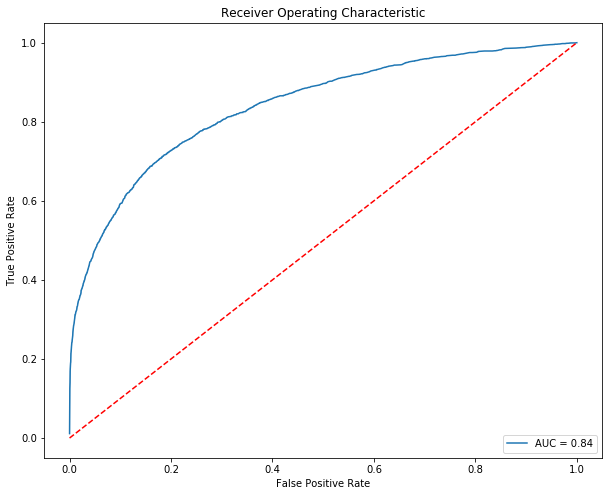

In [84]:
# 测试集评估
best_est_LGB = LGB_random.best_estimator_
y_pred = best_est_LGB.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [85]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     11073
           1       0.64      0.56      0.60      3089

    accuracy                           0.84     14162
   macro avg       0.76      0.74      0.75     14162
weighted avg       0.83      0.84      0.83     14162



In [86]:
joblib.dump(best_est_LGB, 'best_est_LGB.pkl')

['best_est_LGB.pkl']

### 选XGB + LGB +RF融合

In [87]:
XGB_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
LGB_random.best_estimator_

LGBMClassifier(bagging_fraction=0.7, bagging_freq=2, cat_smooth=15,
               feature_fraction=0.7, lambda_l1=0, lambda_l2=15,
               learning_rate=0.15, max_depth=25, metric='auc',
               objective='binary')

In [89]:
RF_random.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=2, n_estimators=27)

In [90]:
y_pred = 0.4* best_est_XGB.predict_proba(x_test)[:,1] + 0.3*best_est_LGB.predict_proba(x_test)[:,1] + 0.3*best_est_RF.predict_proba(x_test)[:,1]

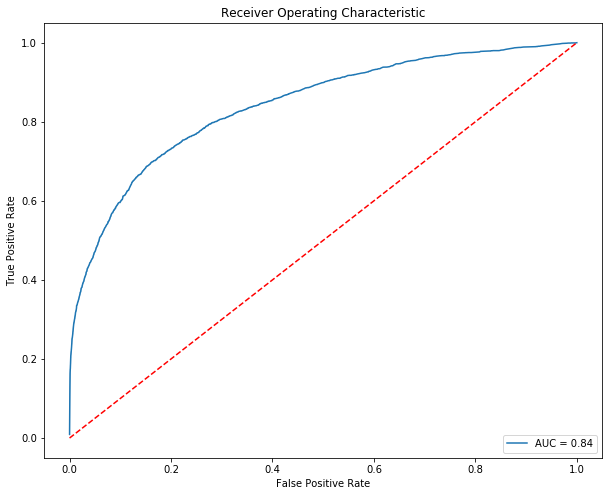

In [91]:
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [92]:
y_pred_class = list(map(lambda x:1 if x>=0.3 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89     11073
           1       0.59      0.65      0.62      3089

    accuracy                           0.83     14162
   macro avg       0.75      0.76      0.75     14162
weighted avg       0.83      0.83      0.83     14162



### 转化为分数

In [93]:
image_info_change.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label
0,23509,SSR1414-竖版（3D混剪）,16,2020-07-16,489.0,0.586,0.831,0.009,1.116,0.946,1.235,-0.626,1.156,0.0,0.079,0.071,0.023,1.169,0.0702,262.0,2021-05-01,0
2,26441,SSR1909-竖版（3D混剪）,16,2020-11-10,757.0,-1.839,-2.481,-1.885,-1.493,-0.707,-0.726,-0.856,-0.922,2.0,0.079,-2.463,-1.274,-0.436,0.0729,44716.0,2021-05-01,1
3,27824,SSR2078-横版（3D混剪）,16,2020-12-16,508.0,0.017,0.831,0.009,1.116,0.250,1.235,-0.044,1.156,0.0,0.079,0.071,0.023,1.169,0.1333,1496.0,2021-05-01,0
4,27945,SSR2101-横版（3D混剪),16,2020-12-21,626.0,-0.337,-0.553,-0.340,-0.710,0.679,-1.002,-0.044,-0.557,0.0,0.079,0.071,0.023,-0.436,0.1538,6368.0,2021-05-01,1
5,28193,SSR2138-竖版（3D混剪）~1,16,2020-12-28,626.0,1.248,0.831,0.784,1.116,0.679,1.235,-0.856,1.156,0.0,0.079,0.071,0.023,1.169,0.1250,0.0,2021-05-01,0


In [94]:
feature = image_info_change[select_feature].drop('label',axis=1)
image_info_change['pred'] = 0.4* best_est_XGB.predict_proba(feature)[:,1] + 0.3*best_est_LGB.predict_proba(feature)[:,1] + 0.3*best_est_RF.predict_proba(feature)[:,1]

In [95]:
image_info_change.shape

(56646, 23)

In [96]:
image_info_change.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label,pred
0,23509,SSR1414-竖版（3D混剪）,16,2020-07-16,489.0,0.586,0.831,0.009,1.116,0.946,1.235,-0.626,1.156,0.0,0.079,0.071,0.023,1.169,0.0702,262.0,2021-05-01,0,0.105684
2,26441,SSR1909-竖版（3D混剪）,16,2020-11-10,757.0,-1.839,-2.481,-1.885,-1.493,-0.707,-0.726,-0.856,-0.922,2.0,0.079,-2.463,-1.274,-0.436,0.0729,44716.0,2021-05-01,1,0.607447
3,27824,SSR2078-横版（3D混剪）,16,2020-12-16,508.0,0.017,0.831,0.009,1.116,0.250,1.235,-0.044,1.156,0.0,0.079,0.071,0.023,1.169,0.1333,1496.0,2021-05-01,0,0.120919
4,27945,SSR2101-横版（3D混剪),16,2020-12-21,626.0,-0.337,-0.553,-0.340,-0.710,0.679,-1.002,-0.044,-0.557,0.0,0.079,0.071,0.023,-0.436,0.1538,6368.0,2021-05-01,1,0.267172
5,28193,SSR2138-竖版（3D混剪）~1,16,2020-12-28,626.0,1.248,0.831,0.784,1.116,0.679,1.235,-0.856,1.156,0.0,0.079,0.071,0.023,1.169,0.1250,0.0,2021-05-01,0,0.186759


In [97]:
image_info_change.to_csv('./image_info_change.csv',index=0)

In [98]:
image_info_label.to_csv('./image_info_label.csv',index=0)

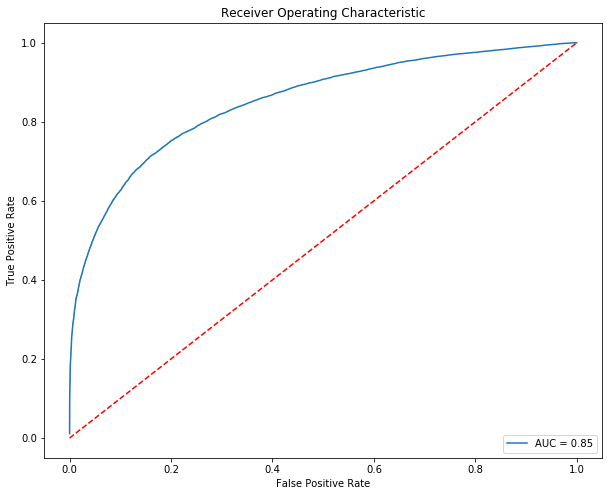

In [99]:
fpr,tpr,_ = roc_curve(image_info_change['label'], image_info_change['pred'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [100]:
y_pred_class = list(map(lambda x:1 if x>=0.3 else 0, image_info_change['pred']))
print(classification_report(image_info_change['label'], y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     44262
           1       0.60      0.67      0.63     12384

    accuracy                           0.83     56646
   macro avg       0.75      0.77      0.76     56646
weighted avg       0.84      0.83      0.83     56646



In [101]:
def Prob2Score(prob, basePoint=600, PDO=30):
    #将概率转化成分数且为正整数
    y = np.log(prob/(1-prob))
    return (basePoint+int(PDO/np.log(2)*(y)))

In [102]:
Prob2Score(0.3)

564

In [103]:
image_info_change['score'] = image_info_change['pred'].apply(Prob2Score)

In [104]:
image_info_label['score'] = image_info_change['score']

In [105]:
image_info_label.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label,score
0,23509,SSR1414-竖版（3D混剪）,16,2020-07-16,489.0,3913.53,0.0,57.0,0.0,1.0,0.0000,68.658421,inf,0.0,0.0000,0.0,0.0,0.000000,0.0702,262.0,2021-05-01,0,508
2,26441,SSR1909-竖版（3D混剪）,16,2020-11-10,757.0,78904.83,14.0,2120.0,1478.0,26.0,0.0066,37.219259,5636.059286,2.0,0.0769,739.0,7.0,0.018731,0.0729,44716.0,2021-05-01,1,618
3,27824,SSR2078-横版（3D混剪）,16,2020-12-16,508.0,9341.00,0.0,81.0,0.0,7.0,0.0000,115.320988,inf,0.0,0.0000,0.0,0.0,0.000000,0.1333,1496.0,2021-05-01,0,515
4,27945,SSR2101-横版（3D混剪),16,2020-12-21,626.0,14992.50,2.0,117.0,254.0,3.0,0.0171,128.141026,7496.250000,0.0,0.0000,0.0,0.0,0.016942,0.1538,6368.0,2021-05-01,1,557
5,28193,SSR2138-竖版（3D混剪）~1,16,2020-12-28,626.0,656.07,0.0,15.0,0.0,3.0,0.0000,43.738000,inf,0.0,0.0000,0.0,0.0,0.000000,0.1250,0.0,2021-05-01,0,537


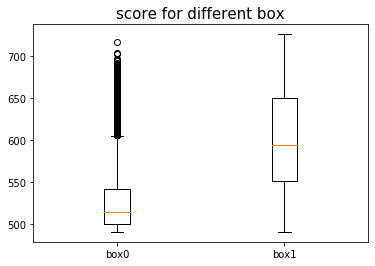

In [106]:
box0 = image_info_label[image_info_label['label']==0]['score']
box1 = image_info_label[image_info_label['label']==1]['score']
plt.title('score for different box',fontsize=15)
labels = 'box0','box1'
plt.boxplot([box0,box1],labels=labels)
plt.show()

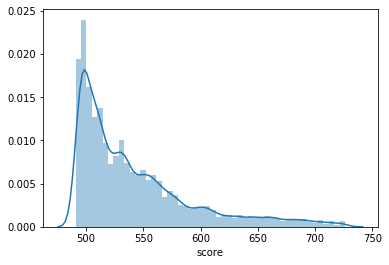

In [107]:
sns.distplot(image_info_label['score'])
plt.show()

In [108]:
image_info_label[image_info_label['score']>=600]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']>=600]['image_run_date_amount'].sum()

0.7666360527980214

In [109]:
image_info_label[image_info_label['score']<600]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']<600]['image_run_date_amount'].sum()

0.32362598067761966

In [110]:
image_info_label['create_role_30_pay_sum'].sum()

518394127.0

In [111]:
image_info_label[image_info_label['score']<600]['create_role_30_pay_sum'].sum()

137201191.0

In [112]:
image_info_label['create_role_30_pay_sum'].sum() / image_info_label['image_run_date_amount'].sum()

0.5627513732376456

In [113]:
image_info_label[image_info_label['score']>=600]['image_run_date_amount'].sum() / image_info_label['image_run_date_amount'].sum()

0.539774166793743

In [114]:
image_info_label[image_info_label['score']>=660]['image_run_date_amount'].sum() / image_info_label['image_run_date_amount'].sum()

0.32211298411412737

In [115]:
print('高分区ROI：',image_info_label[image_info_label['score']>=660]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']>=660]['image_run_date_amount'].sum())
print('低分区ROI：',image_info_label[image_info_label['score']<660]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']<660]['image_run_date_amount'].sum())

高分区ROI： 0.8298825299669175
低分区ROI： 0.4358181055581079


In [116]:
print('高分区ROI：',image_info_label[image_info_label['score']>=560]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']>=560]['image_run_date_amount'].sum())
print('低分区ROI：',image_info_label[image_info_label['score']<560]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']<560]['image_run_date_amount'].sum())

高分区ROI： 0.6859166462829975
低分区ROI： 0.23656219871579173


In [117]:
image_info_label.drop(['image_id','create_role_30_pay_sum','label'],axis=1).corr()['score'].sort_values()

image_create_role_cost        -0.375306
image_create_role_pay_cost    -0.218371
media_id                      -0.097719
image_create_role_retain_1d    0.015127
image_pay_num_ability          0.142237
image_pay_sum_ability          0.152418
image_valid_source_rate        0.169814
image_valid_source_num         0.187238
image_create_role_pay_rate     0.319722
image_source_total_num         0.355524
image_create_role_roi          0.392495
image_create_role_num          0.512175
image_source_num               0.549110
image_create_role_pay_num      0.589341
image_run_date_amount          0.598829
image_create_role_pay_sum      0.617849
score                          1.000000
Name: score, dtype: float64

### Test

In [100]:
test = pd.read_excel('./test.xls')

In [101]:
test.head()

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win
0,16276,5710.84,0,196,0,7,0.0,29.136939,0.0,0,0.0,0.0,0.0,0.0,0.1005,0,2020-10-02,3
1,16316,1023.57,0,7,0,2,0.0,146.224286,0.0,0,0.0,0.0,0.0,0.0,0.1000,0,2020-10-02,3
2,18216,3303.96,0,58,0,2,0.0,56.964828,0.0,0,0.0,0.0,0.0,0.0,0.0455,0,2020-10-02,3
3,19100,3739.89,0,66,0,1,0.0,56.665000,0.0,0,0.0,0.0,0.0,0.0,0.0735,0,2020-10-02,3
4,19208,4388.16,0,69,0,2,0.0,63.596522,0.0,0,0.0,0.0,0.0,0.0,0.0145,12,2020-10-02,3


In [102]:
test.shape

(2852, 18)

In [103]:
test_woe = test.copy()

In [104]:
def FE(df):
    df['image_create_role_cost'].replace(0, float('inf'), inplace=True)
    df['image_create_role_pay_cost'].replace(0, float('inf'), inplace=True)
    # 分桶定义（根据训练模型给出）
    pinf = float('inf')  # 正无穷大
    ninf = float('-inf')  # 负无穷大
    cutx1 = [ninf, 891.102, 1409.628, 2165.43, 3167.068, 4656.48, 6886.692, 10651.84, 18862.02, 40665.782, pinf]
    cutx2 = [ninf, 1, 3, 8, 12, 50, pinf]
    cutx3 = [ninf, 6.0, 14.0, 27.0, 51.0, 85.0, 142.0, 244.0, 480.0, 1271.0, pinf]
    cutx4 = [ninf, 60, 200, 700, 2000, 5000, 10000, pinf]
    cutx5 = [ninf, 3, 6, 12, 20, 50, pinf]
    cutx6 = [ninf, 0.005, 0.01, 0.015, 0.02, pinf]
    cutx7 = [ninf, 20.073, 28.7217, 36.4717, 45.8384, 57.2259, 74.043, 98.3442, 141.3023, 254.55, pinf]
    cutx8 = [ninf, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 13000, pinf]
    cutx9 = [ninf, 0.1, 0.2, 0.3, 0.4, 0.6, pinf]
    cutx10 = [ninf, 50, 100, 200, 400, 1000, pinf]
    cutx11 = [ninf, 1, 2, 5, 10, 20, pinf]
    cutx12 = [ninf, 0.005, 0.01, 0.015, 0.02, 0.025, 0.05, pinf]

    
    woex1 = [1.332, 1.202, 0.953, 0.845, 0.503, 0.216, 0.031, -0.363, -0.871, -1.702]
    woex2 = [0.896, -0.47, -1.078, -1.616, -2.105, -4.266]
    woex3 = [1.902, 1.227, 0.873, 0.771, 0.503, 0.215, 0.022, -0.394, -0.862, -1.784]
    woex4 = [1.0, -0.098, -0.943, -1.772, -2.692, -3.759, -5.138]
    woex5 = [0.552, -0.086, -0.573, -0.865, -1.345, -3.033]
    woex6 = [0.691, -0.919, -0.999, -0.956, -0.646]
    woex7 = [-0.609, -0.703, -0.521, -0.481, -0.139, 0.059, 0.359, 0.689, 1.315, 1.777]
    woex8 = [-1.338, -1.316, -1.277, -0.962, -0.781, -0.609, -0.363, -0.261, -0.112, -0.076, 0.243, 1.219]
    woex9 = [0.513, -0.717, -1.43, -1.04, -1.413, -1.256]
    woex10 = [0.443, -0.981, -1.658, -2.221, -2.823, -3.33]
    woex11 = [0.343, -1.502, -2.005, -2.372, -2.66, -2.883]
    woex12 = [1.104, 0.044, -0.404, -0.896, -1.163, -1.872, -2.508]

    
    # 数据转化
    df['image_run_date_amount'] = change_woe(df['image_run_date_amount'], cutx1, woex1)
    df['image_create_role_pay_num'] = change_woe(df['image_create_role_pay_num'], cutx2, woex2)
    df['image_create_role_num'] = change_woe(df['image_create_role_num'], cutx3, woex3)
    df['image_create_role_pay_sum'] = change_woe(df['image_create_role_pay_sum'], cutx4,woex4)
    df['image_source_num'] = change_woe(df['image_source_num'], cutx5, woex5)
    df['image_create_role_pay_rate'] = change_woe(df['image_create_role_pay_rate'], cutx6,woex6)
    df['image_create_role_cost'] = change_woe(df['image_create_role_cost'], cutx7, woex7)
    df['image_create_role_pay_cost'] = change_woe(df['image_create_role_pay_cost'], cutx8,woex8)
    df['image_valid_source_rate'] = change_woe(df['image_valid_source_rate'], cutx9,woex9)
    df['image_pay_sum_ability'] = change_woe(df['image_pay_sum_ability'], cutx10, woex10)
    df['image_pay_num_ability'] = change_woe(df['image_pay_num_ability'], cutx11, woex11)
    df['image_create_role_roi'] = change_woe(df['image_create_role_roi'], cutx12, woex12)    

    return df

In [105]:
test_woe = FE(test_woe)

In [106]:
test_woe.head()

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win
0,16276,0.216,0.896,0.022,1.0,-0.573,0.691,-0.521,1.219,0,0.513,0.443,0.343,1.104,0.1005,0,2020-10-02,3
1,16316,1.202,0.896,1.227,1.0,0.552,0.691,1.315,1.219,0,0.513,0.443,0.343,1.104,0.1000,0,2020-10-02,3
2,18216,0.503,0.896,0.503,1.0,0.552,0.691,-0.139,1.219,0,0.513,0.443,0.343,1.104,0.0455,0,2020-10-02,3
3,19100,0.503,0.896,0.503,1.0,0.552,0.691,-0.139,1.219,0,0.513,0.443,0.343,1.104,0.0735,0,2020-10-02,3
4,19208,0.503,0.896,0.503,1.0,0.552,0.691,0.059,1.219,0,0.513,0.443,0.343,1.104,0.0145,12,2020-10-02,3


In [107]:
select_feature = ['image_run_date_amount', 'image_create_role_pay_num',
                  'image_create_role_num', 'image_create_role_pay_sum',
                  'image_source_num', 'image_create_role_pay_rate',
                  'image_create_role_cost', 'image_create_role_pay_cost',
                  'image_valid_source_rate',
                  'image_pay_sum_ability', 'image_pay_num_ability',
                  'image_create_role_roi']


feature = test_woe[select_feature]
test_woe['pred'] = 0.4 * best_est_XGB.predict_proba(feature)[:, 1] + 0.3 * best_est_LGB.predict_proba(
    feature)[:, 1] + 0.3 * best_est_RF.predict_proba(feature)[:, 1]
test_woe['score'] = test_woe['pred'].apply(Prob2Score)
test['score'] = test_woe['score']

In [108]:
test.sort_values('score',ascending=False)

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win,score
2533,25825,89257.66,24,3084,10794,15,0.0078,28.942173,3719.069167,3,0.2000,3598.000000,8.0000,0.120931,0.0551,141734,2020-11-01,3,735
2362,25825,72470.33,16,2459,10570,14,0.0065,29.471464,4529.395625,4,0.2857,2642.500000,4.0000,0.145853,0.0479,65282,2020-10-30,3,729
890,25345,44824.88,13,1891,2510,13,0.0069,23.704326,3448.067692,11,0.8462,228.181818,1.1818,0.055996,0.0584,43770,2020-10-11,3,729
2618,25825,106045.10,22,3755,9820,19,0.0059,28.241039,4820.231818,13,0.6842,755.384615,1.6923,0.092602,0.0522,134730,2020-11-02,3,728
2446,25825,97988.29,24,3348,10926,16,0.0072,29.267709,4082.845417,4,0.2500,2731.500000,6.0000,0.111503,0.0548,141988,2020-10-31,3,726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,24445,2059.11,0,8,0,3,0.0000,257.388750,0.000000,0,0.0000,0.000000,0.0000,0.000000,0.1250,4220,2020-10-09,3,469
674,24445,2059.11,0,8,0,3,0.0000,257.388750,0.000000,0,0.0000,0.000000,0.0000,0.000000,0.1250,4220,2020-10-08,3,469
2551,26121,1872.36,0,7,0,3,0.0000,267.480000,0.000000,0,0.0000,0.000000,0.0000,0.000000,0.2308,68,2020-11-01,3,469
820,24445,2059.11,0,8,0,3,0.0000,257.388750,0.000000,0,0.0000,0.000000,0.0000,0.000000,0.1250,4220,2020-10-10,3,469


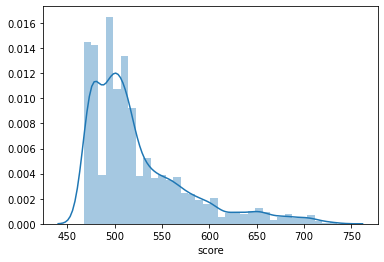

In [109]:
sns.distplot(test['score'])
plt.show()

In [110]:
test[test['score']>=600]['create_role_30_pay_sum'].sum() / test[test['score']>=600]['image_run_date_amount'].sum()

0.549167637171736

In [111]:
test[test['score']<600]['create_role_30_pay_sum'].sum() / test[test['score']<600]['image_run_date_amount'].sum()

0.27111068946220107

In [112]:
print('高分区ROI：',test[test['score']>=560]['create_role_30_pay_sum'].sum() / test[test['score']>=560]['image_run_date_amount'].sum())
print('低分区ROI：',test[test['score']<560]['create_role_30_pay_sum'].sum() / test[test['score']<560]['image_run_date_amount'].sum())

高分区ROI： 0.4904240827588625
低分区ROI： 0.221839613226351


In [113]:
print('高分区ROI：',test[test['score']>=540]['create_role_30_pay_sum'].sum() / test[test['score']>=540]['image_run_date_amount'].sum())
print('低分区ROI：',test[test['score']<540]['create_role_30_pay_sum'].sum() / test[test['score']<540]['image_run_date_amount'].sum())

高分区ROI： 0.4584466741476629
低分区ROI： 0.19557384096132063


In [114]:
print('高分区ROI：',test[test['score']>=520]['create_role_30_pay_sum'].sum() / test[test['score']>=520]['image_run_date_amount'].sum())
print('低分区ROI：',test[test['score']<520]['create_role_30_pay_sum'].sum() / test[test['score']<520]['image_run_date_amount'].sum())

高分区ROI： 0.4317974612458137
低分区ROI： 0.1397669733474111


In [115]:
print('高分区ROI：',test[test['score']>=500]['create_role_30_pay_sum'].sum() / test[test['score']>=500]['image_run_date_amount'].sum())
print('低分区ROI：',test[test['score']<500]['create_role_30_pay_sum'].sum() / test[test['score']<500]['image_run_date_amount'].sum())

高分区ROI： 0.40062306240147766
低分区ROI： 0.14260480039549747


In [116]:
print('全test样本的ROI为：',test['create_role_30_pay_sum'].sum() / test['image_run_date_amount'].sum())

全test样本的ROI为： 0.37838112139818614


In [117]:
print('高分区消耗金额占比',test[test['score']>=560]['image_run_date_amount'].sum() / test['image_run_date_amount'].sum())

高分区消耗金额占比 0.5828390168810047


In [118]:
print('高分区消耗金额占比',test[test['score']>=560]['image_run_date_amount'].sum() / test['image_run_date_amount'].sum())

高分区消耗金额占比 0.5828390168810047


In [119]:
test.head()

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win,score
0,16276,5710.84,0,196,0,7,0.0,29.136939,0.0,0,0.0,0.0,0.0,0.0,0.1005,0,2020-10-02,3,511
1,16316,1023.57,0,7,0,2,0.0,146.224286,0.0,0,0.0,0.0,0.0,0.0,0.1000,0,2020-10-02,3,470
2,18216,3303.96,0,58,0,2,0.0,56.964828,0.0,0,0.0,0.0,0.0,0.0,0.0455,0,2020-10-02,3,489
3,19100,3739.89,0,66,0,1,0.0,56.665000,0.0,0,0.0,0.0,0.0,0.0,0.0735,0,2020-10-02,3,489
4,19208,4388.16,0,69,0,2,0.0,63.596522,0.0,0,0.0,0.0,0.0,0.0,0.0145,12,2020-10-02,3,491


In [144]:
test.to_csv('./test_result.csv')